#Exploratory Data Analysis

In [60]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
%matplotlib inline

In [61]:
dataset = pd.read_csv("Customer_churn.csv")
print(dataset.shape)
dataset.head()

(7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [62]:
dataset.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [63]:
dataset.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


<Axes: ylabel='Churn'>

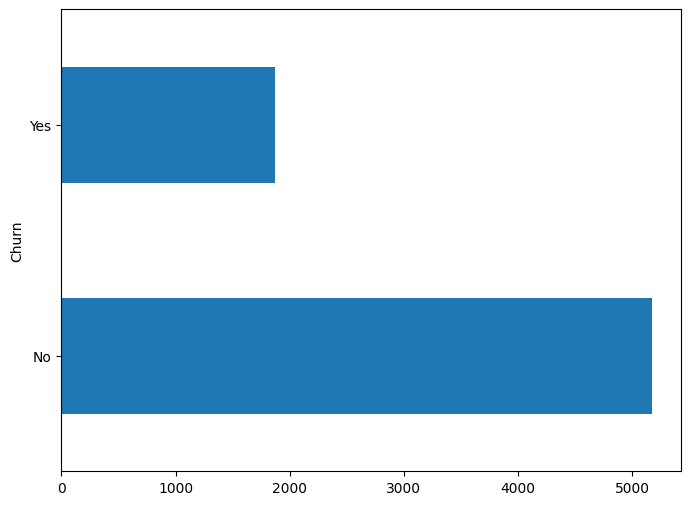

In [64]:
plt.xlabel("Count")
plt.ylabel("Target Variable")
dataset["Churn"].value_counts().plot(kind="barh", figsize=(8, 6))

In [65]:
100*dataset['Churn'].value_counts()/len(dataset['Churn'])

,count
Churn,
No,73.463013
Yes,26.536987


In [66]:
dataset.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


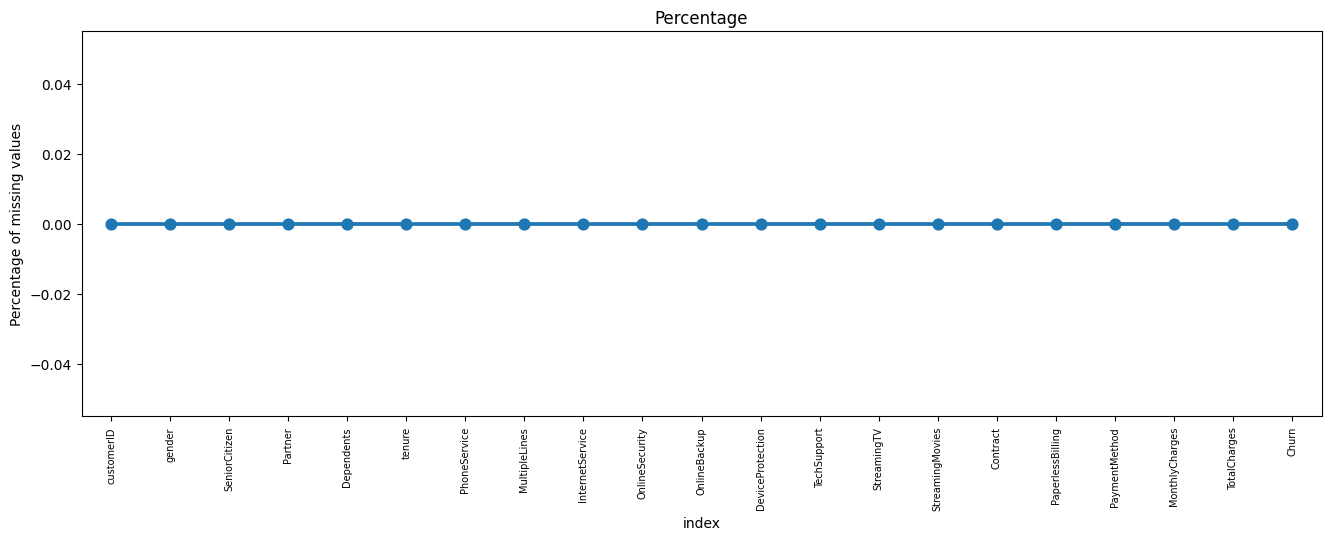

In [67]:
empty_data = pd.DataFrame((dataset.isnull().sum()*100/dataset.shape[0]).reset_index())
plt.figure(figsize=(16, 5))
ax = sns.pointplot(x='index', y=0, data=empty_data)
plt.xticks(rotation='vertical', fontsize=7)
plt.title('Percentage')
plt.ylabel('Percentage of missing values')
plt.show()

#Data Cleaning

In [68]:
df = dataset.copy()

In [69]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [70]:
df.loc[df['TotalCharges'].isnull() == True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [71]:
df.dropna(how='any', inplace = True)

In [72]:
max_tenure_value = df['tenure'].max()

labels = ["{0} - {1}".format(i, i + 11) for i in range(1, max_tenure_value, 12)]
df['tenure_group'] = pd.cut(df.tenure, range(1, max_tenure_value + 10, 12), right=False, labels=labels)

df['tenure_group'].value_counts()

,count
tenure_group,
1 - 12,2175
61 - 72,1407
13 - 24,1024
25 - 36,832
49 - 60,832
37 - 48,762


In [73]:
df.drop(columns = ['customerID', 'tenure'], inplace = True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


#Data Exploration

##Univariate Analysis

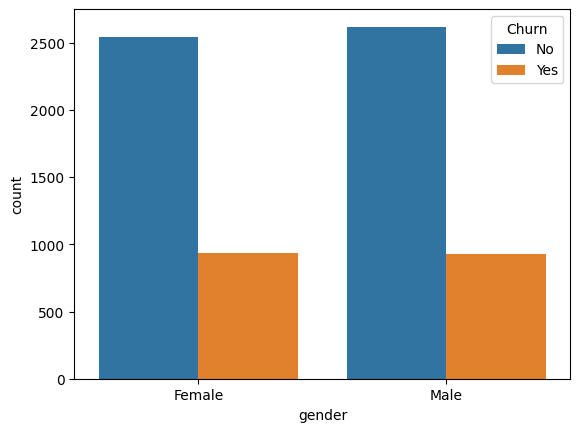

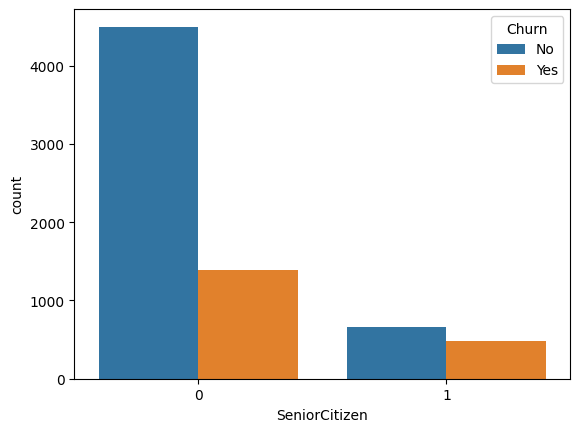

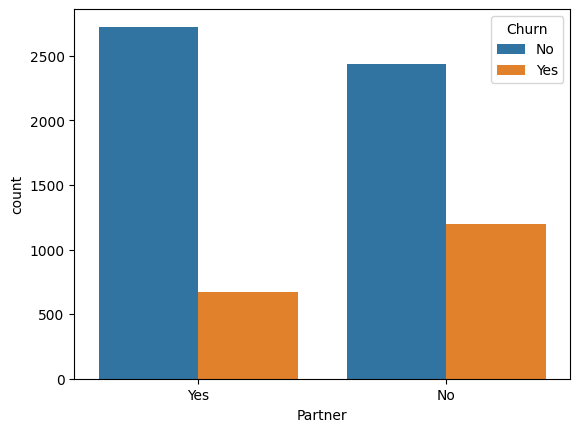

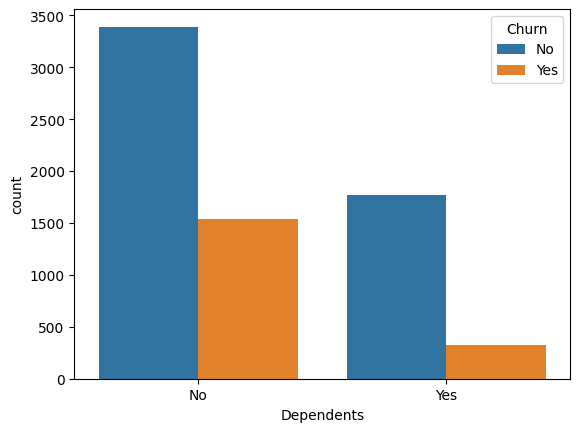

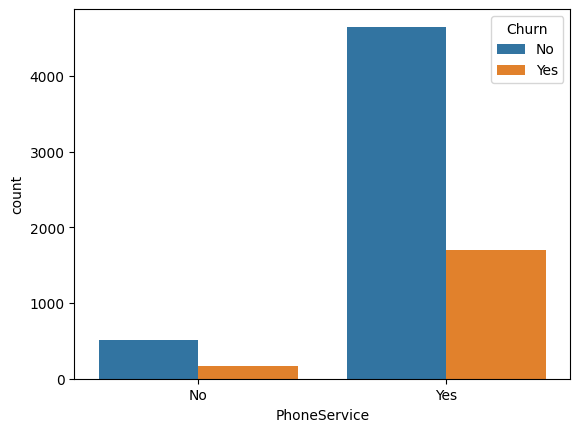

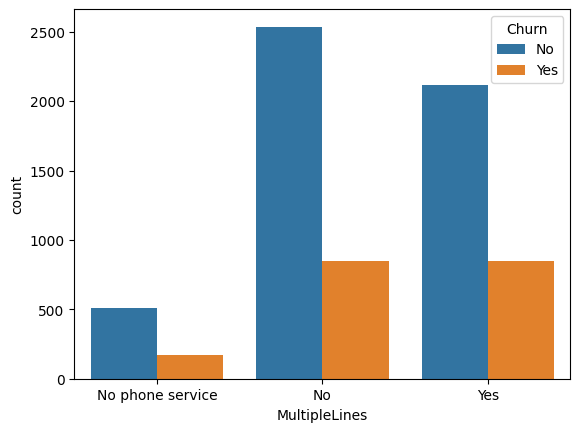

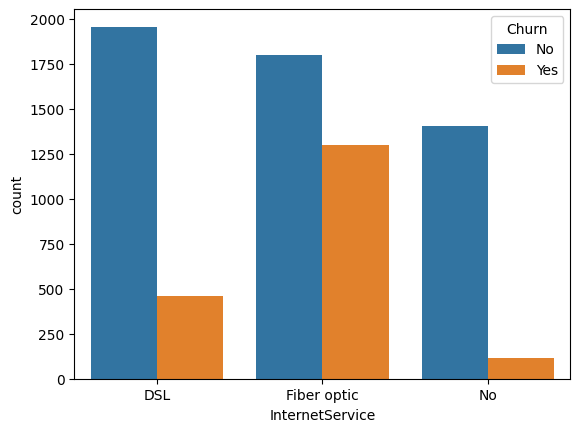

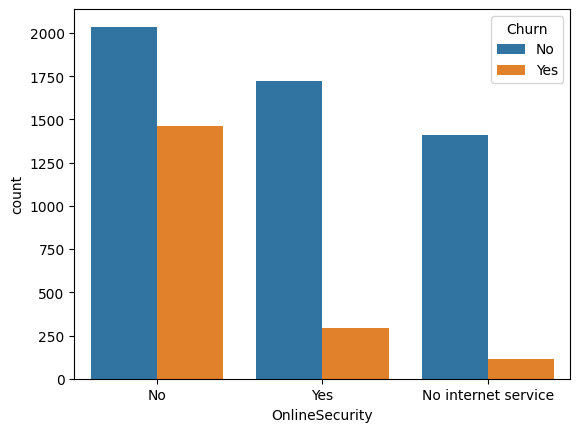

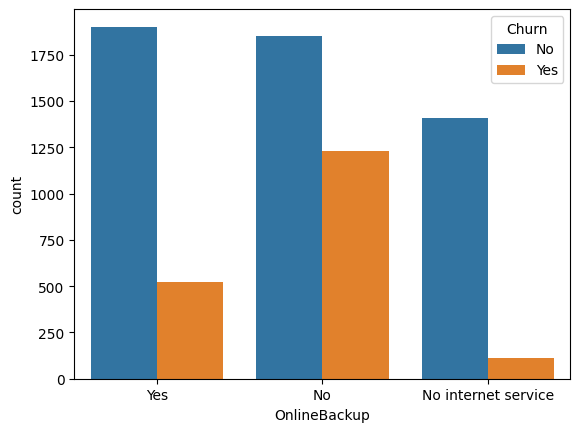

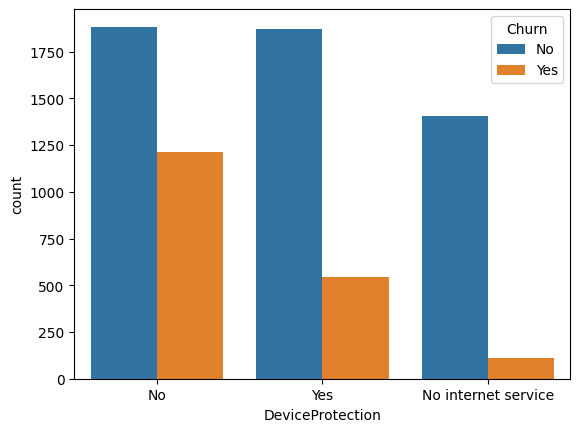

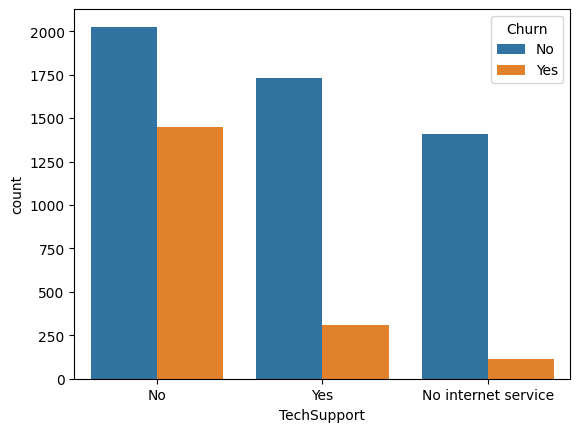

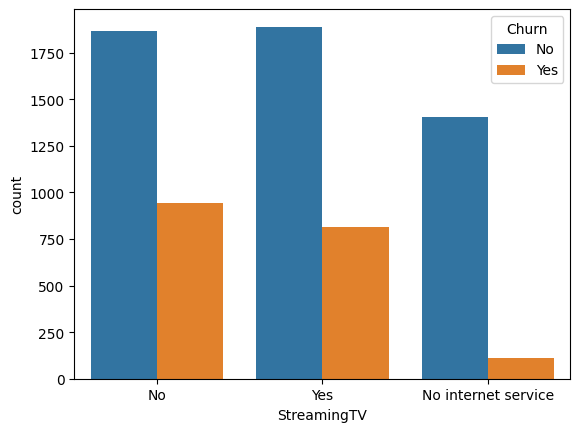

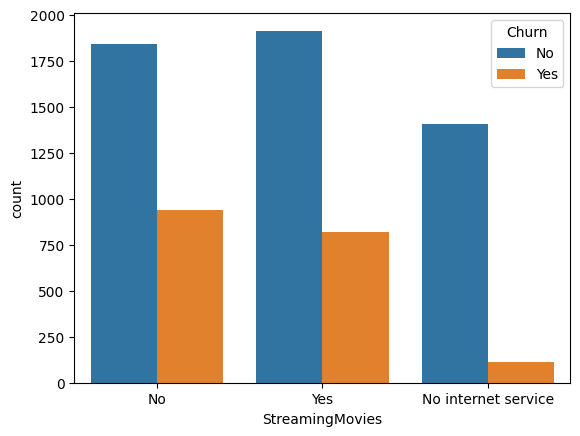

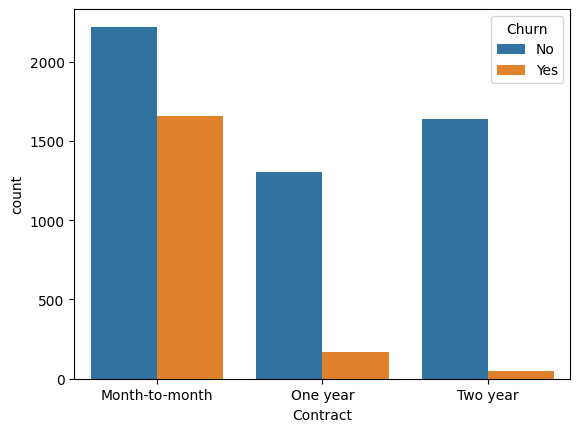

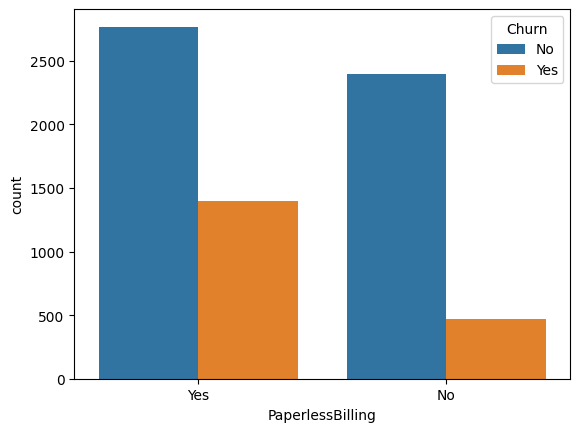

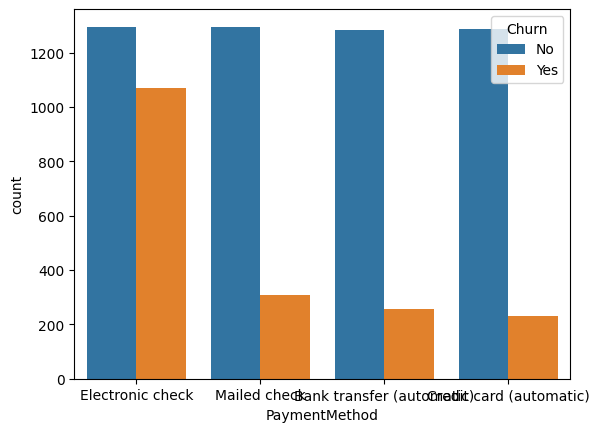

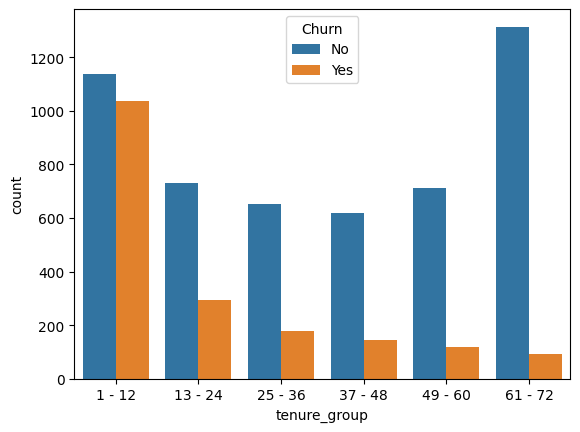

In [74]:
for i, predictor in enumerate(df.drop(columns = ['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data = df, x = predictor, hue = 'Churn')

In [75]:
df['Churn'] = np.where(df['Churn'] == 'Yes', 1, 0)

In [76]:
df_dummies = pd.get_dummies(df)
df_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,True,False,False,True,True,False,...,False,False,True,False,True,False,False,False,False,False
1,0,56.95,1889.50,0,False,True,True,False,True,False,...,False,False,False,True,False,False,True,False,False,False
2,0,53.85,108.15,1,False,True,True,False,True,False,...,False,False,False,True,True,False,False,False,False,False
3,0,42.30,1840.75,0,False,True,True,False,True,False,...,True,False,False,False,False,False,False,True,False,False
4,0,70.70,151.65,1,True,False,True,False,True,False,...,False,False,True,False,True,False,False,False,False,False


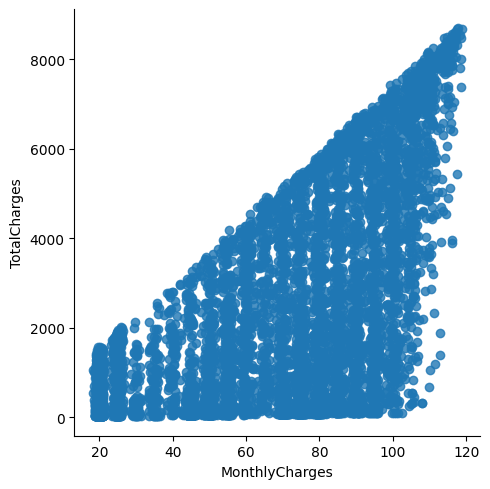

In [77]:
sns.lmplot(data = df_dummies, x = 'MonthlyCharges', y = 'TotalCharges', fit_reg = False)

Text(0.5, 1.0, 'Monthly charges by churn')

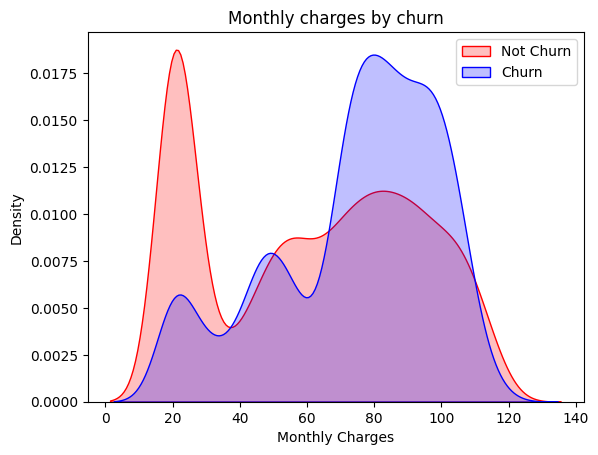

In [78]:
Mth = sns.kdeplot(df_dummies.MonthlyCharges[(df_dummies["Churn"] == 0) ], color="Red", fill = True)
Mth = sns.kdeplot(df_dummies.MonthlyCharges[(df_dummies["Churn"] == 1) ], color="Blue", fill = True)

Mth.legend(["Not Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')

Text(0.5, 1.0, 'Total  charges by churn')

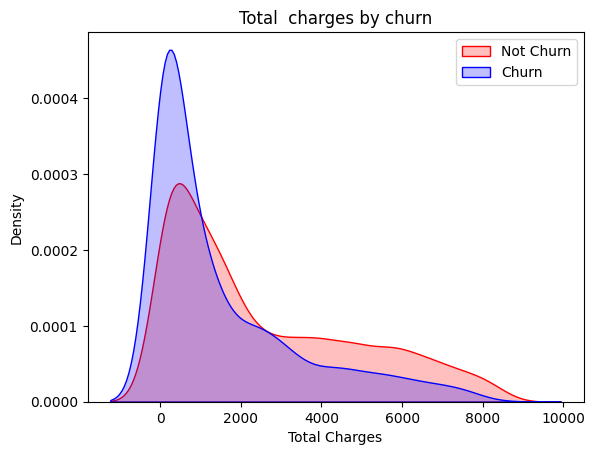

In [79]:
Mth = sns.kdeplot(df_dummies.TotalCharges[(df_dummies["Churn"] == 0) ], color="Red", fill = True)
Mth = sns.kdeplot(df_dummies.TotalCharges[(df_dummies["Churn"] == 1) ], color="Blue", fill = True)

Mth.legend(["Not Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Total Charges')
Mth.set_title('Total  charges by churn')

<Axes: >

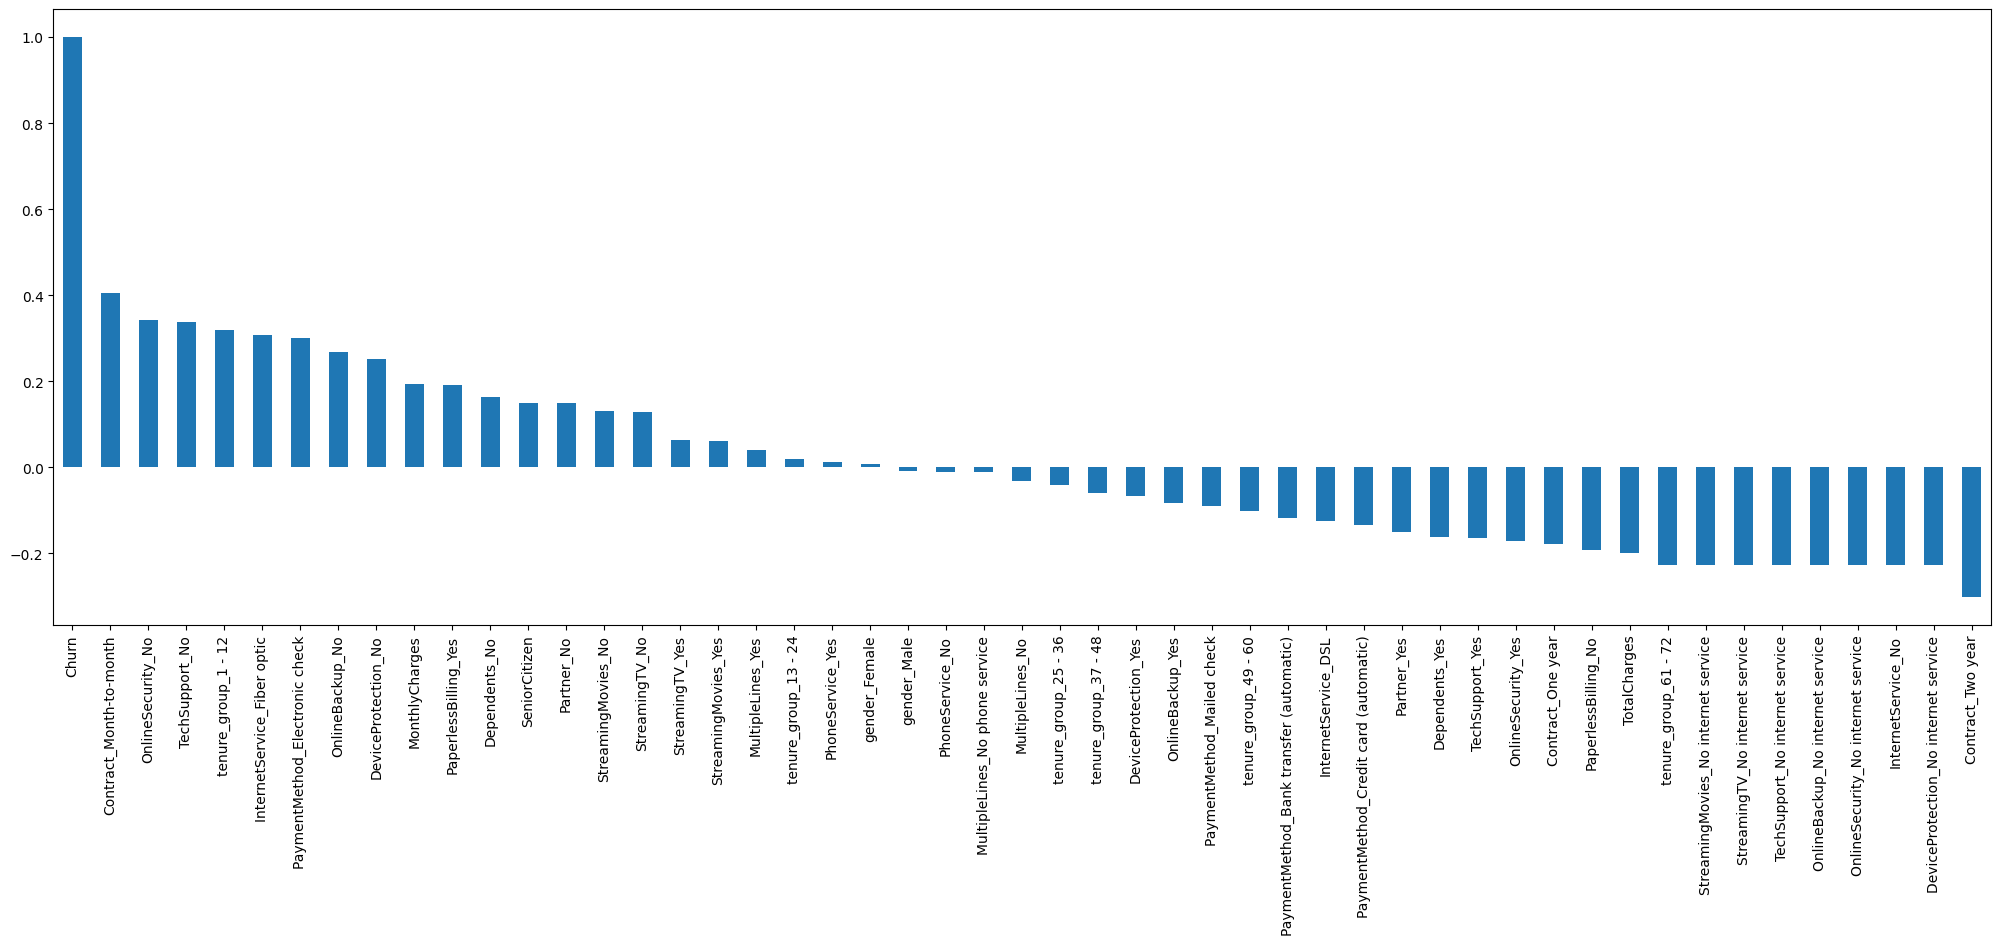

In [80]:
plt.figure(figsize=(25, 8))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

<Axes: >

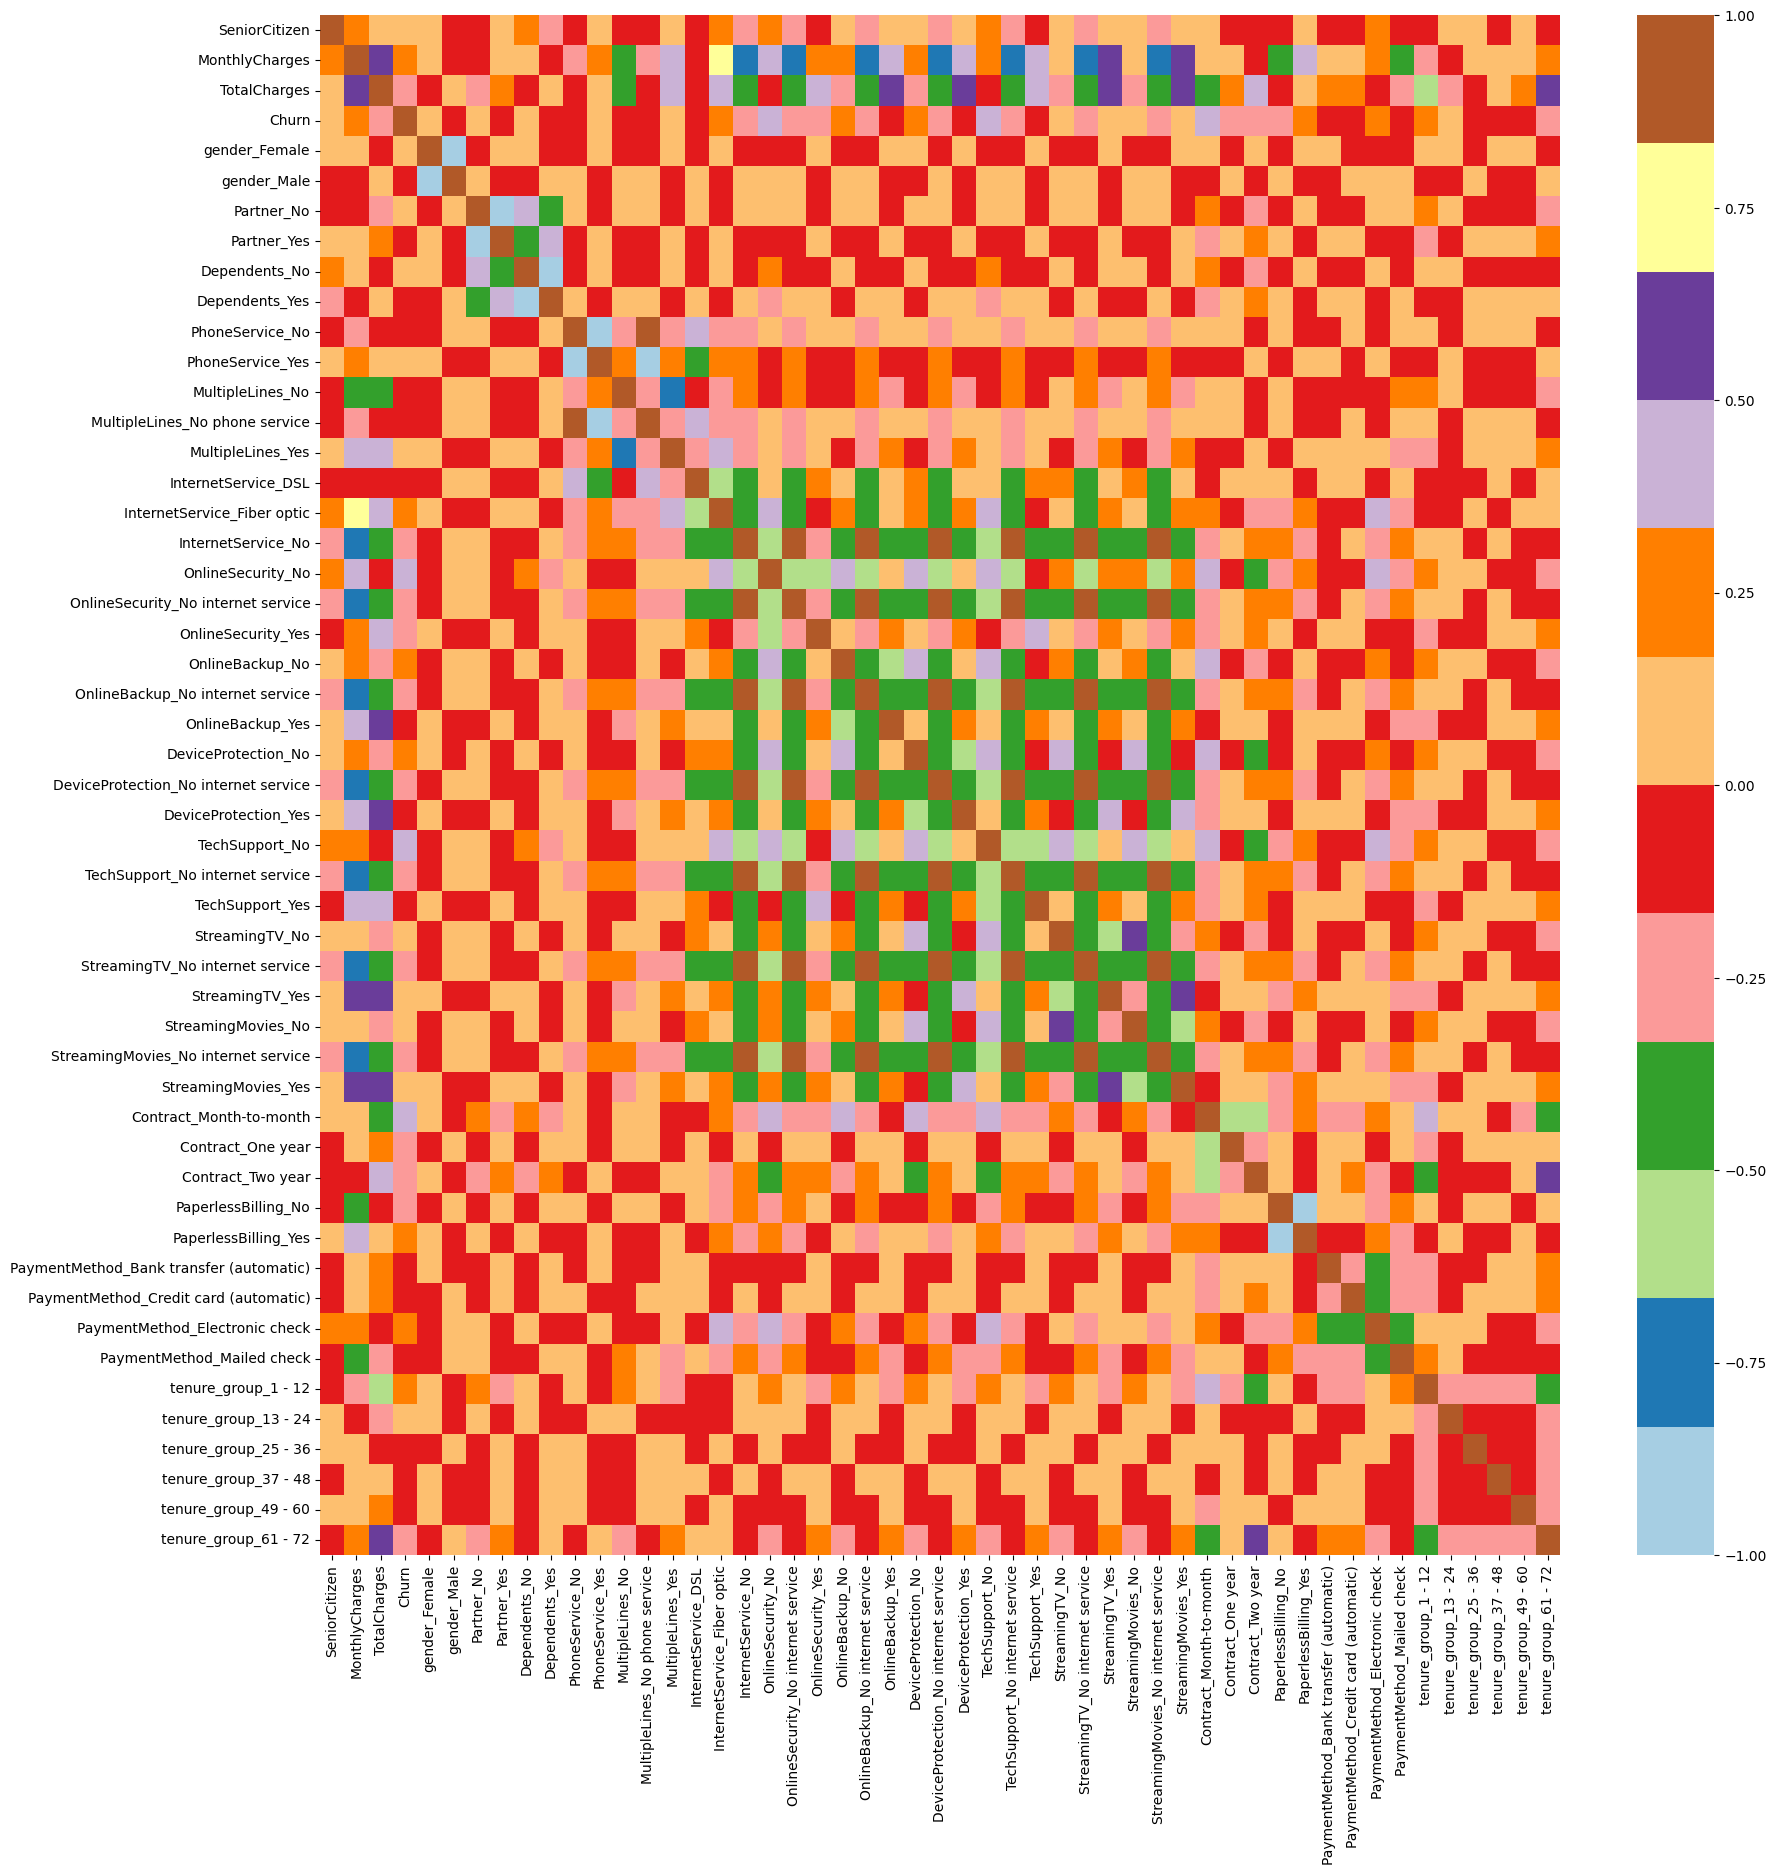

In [81]:
plt.figure(figsize=(20, 20))
sns.heatmap(df_dummies.corr(), cmap="Paired")

#Bivariate Analysis

In [82]:
df_churn = df.loc[df['Churn'] == 1]
df_not_churn = df.loc[df['Churn'] == 0]

In [83]:
df_churn['Partner'].value_counts()

,count
Partner,
No,1200
Yes,669


In [84]:
def uniplot(df,col,title,hue=None):
  sns.set_style('whitegrid')
  sns.set_context('talk')
  plt.rcParams["axes.labelsize"] = 20
  plt.rcParams['axes.titlesize'] = 22
  plt.rcParams['axes.titlepad'] = 30

  temp = pd.Series(data = hue)
  fig, ax = plt.subplots()
  width = len(df[col].unique()) + 7 + 4*len(temp.unique())
  fig.set_size_inches(width , 8)
  plt.xticks(rotation=45)
  plt.title(title)
  ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright')

  for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

  plt.show()

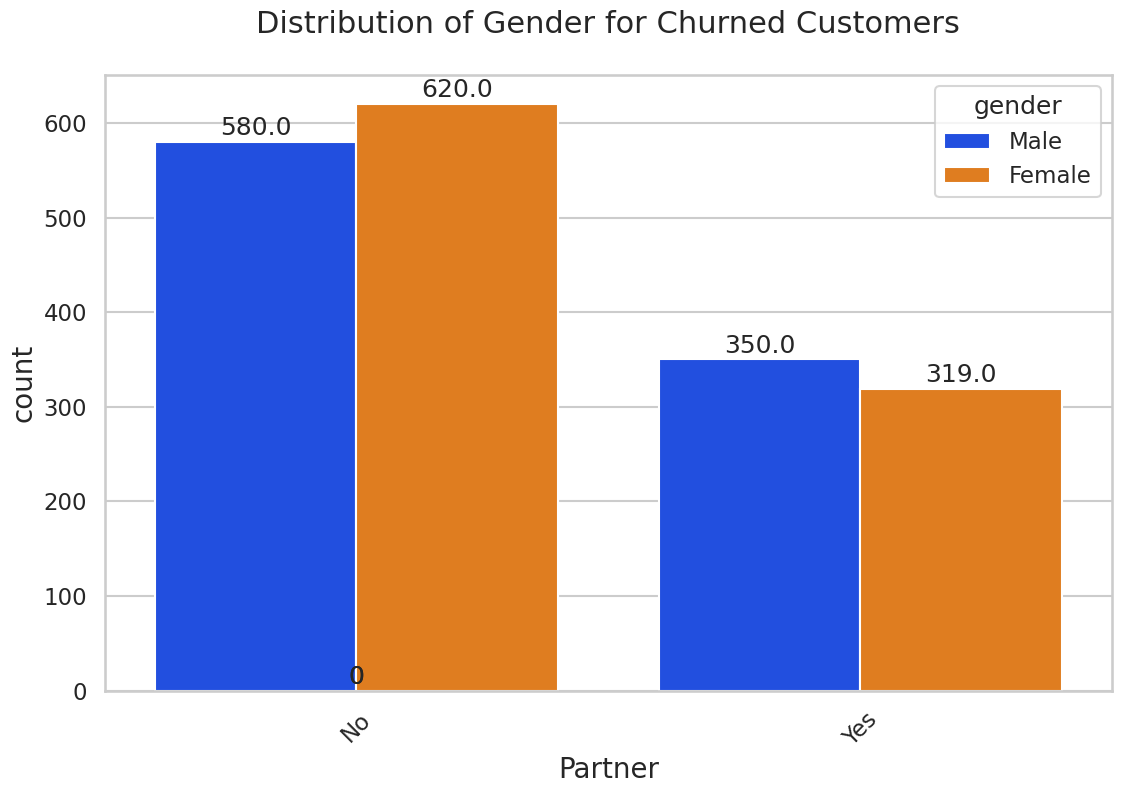

In [85]:
uniplot(df_churn, col='Partner', title='Distribution of Gender for Churned Customers', hue='gender')

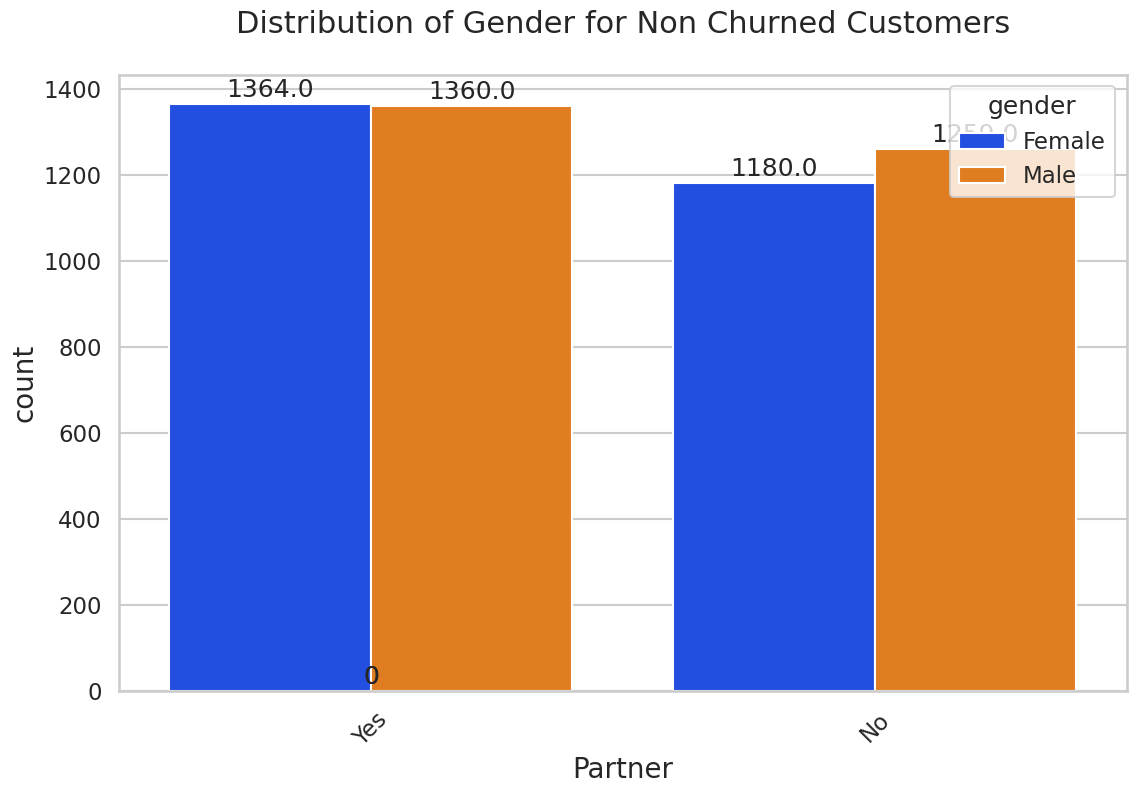

In [86]:
uniplot(df_not_churn, col='Partner', title='Distribution of Gender for Non Churned Customers',hue='gender')

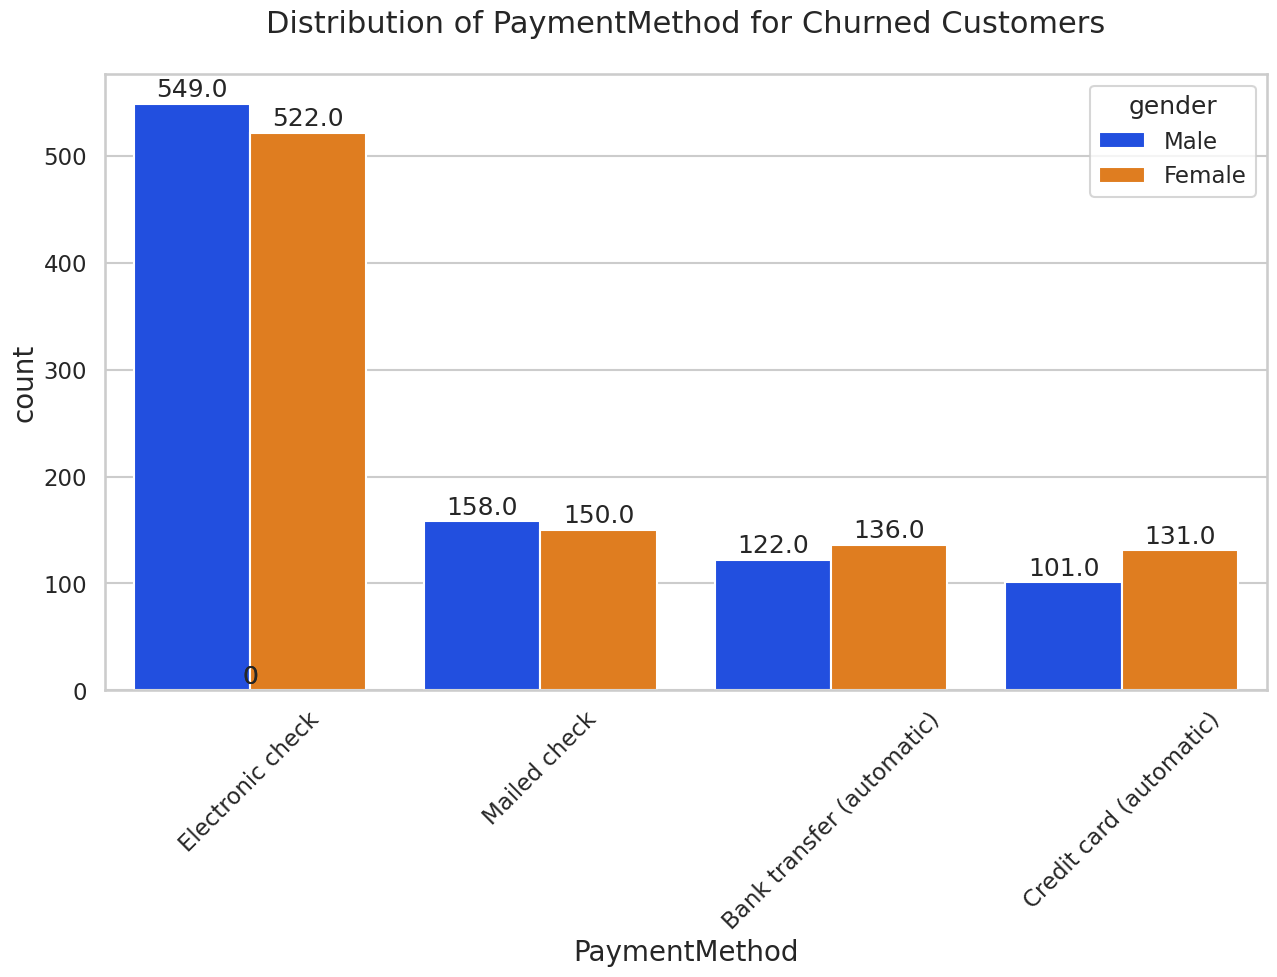

In [87]:
uniplot(df_churn,col='PaymentMethod',title='Distribution of PaymentMethod for Churned Customers',hue='gender')

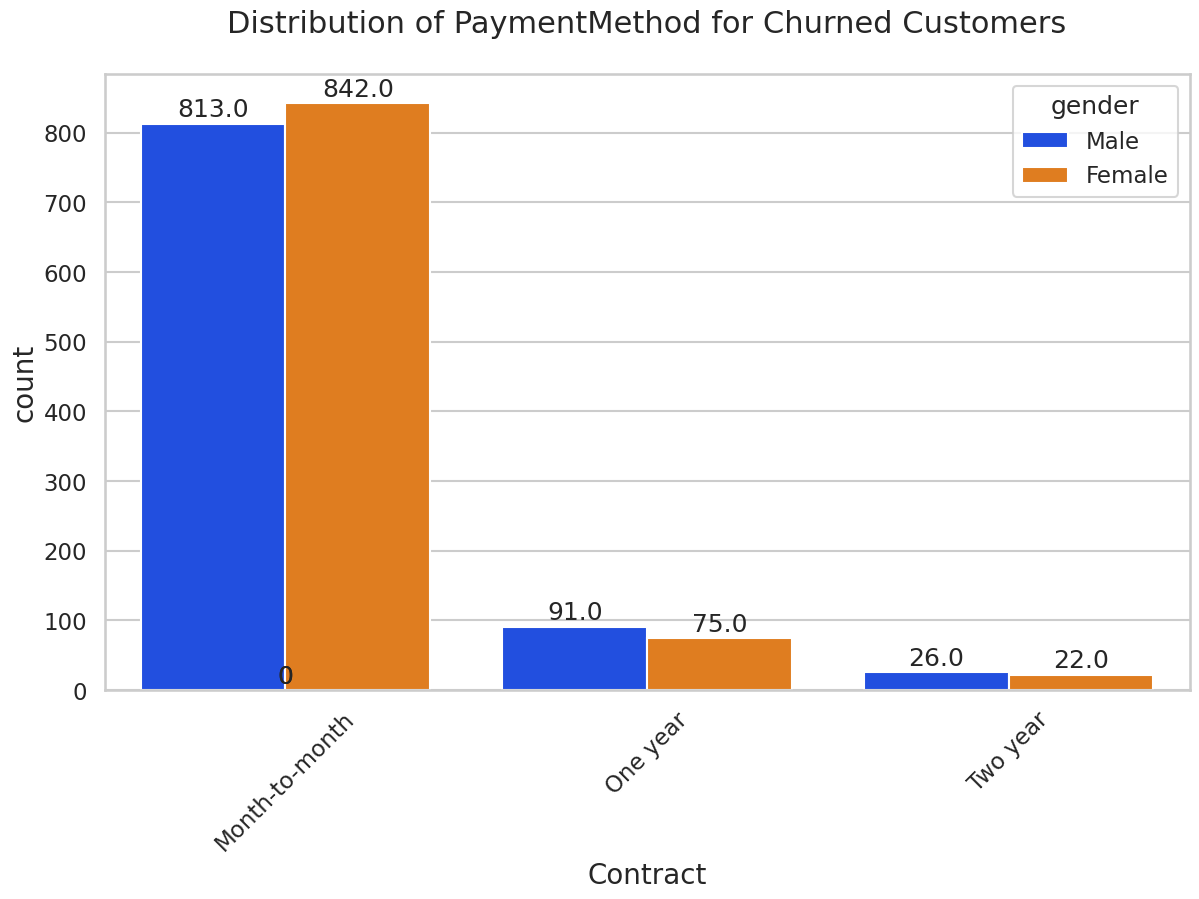

In [88]:
uniplot(df_churn,col='Contract',title='Distribution of PaymentMethod for Churned Customers',hue='gender')

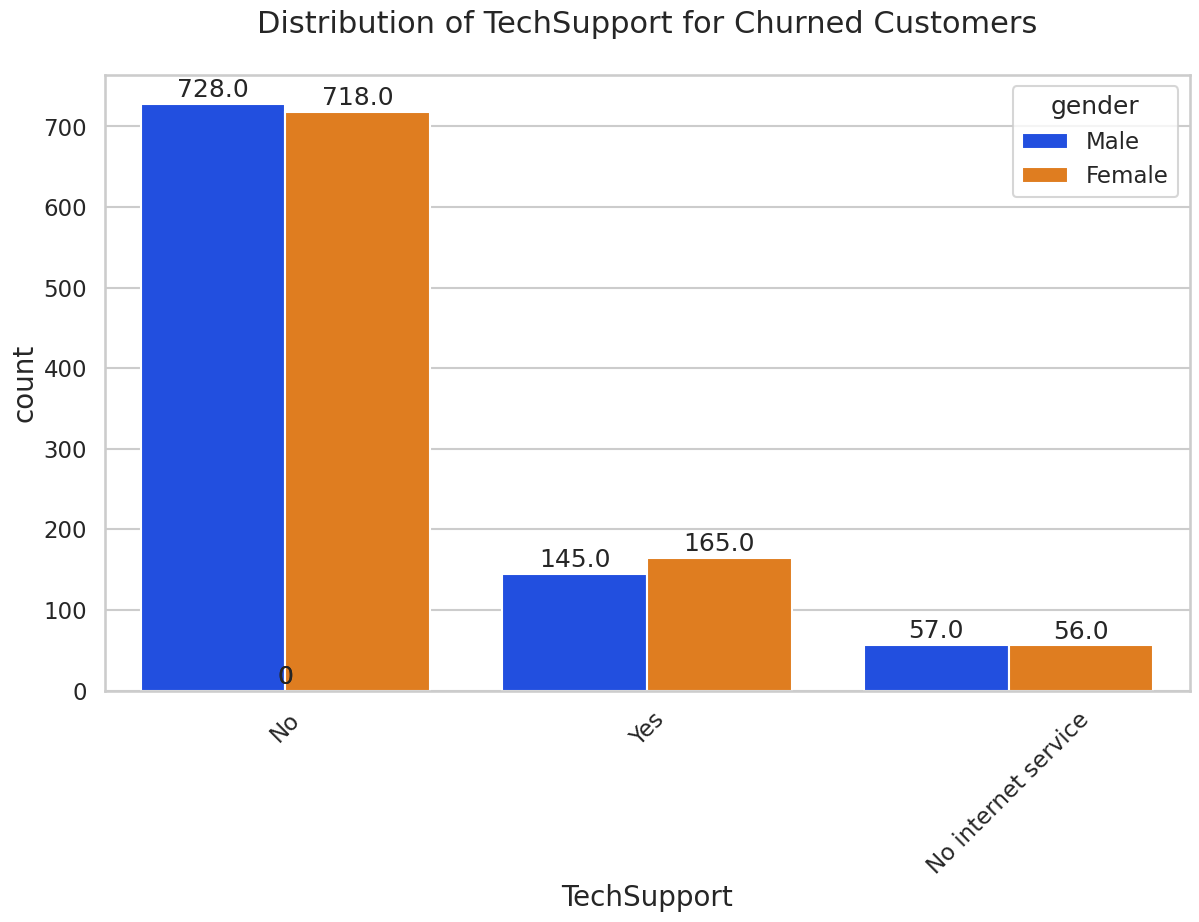

In [89]:
uniplot(df_churn,col='TechSupport',title='Distribution of TechSupport for Churned Customers',hue='gender')

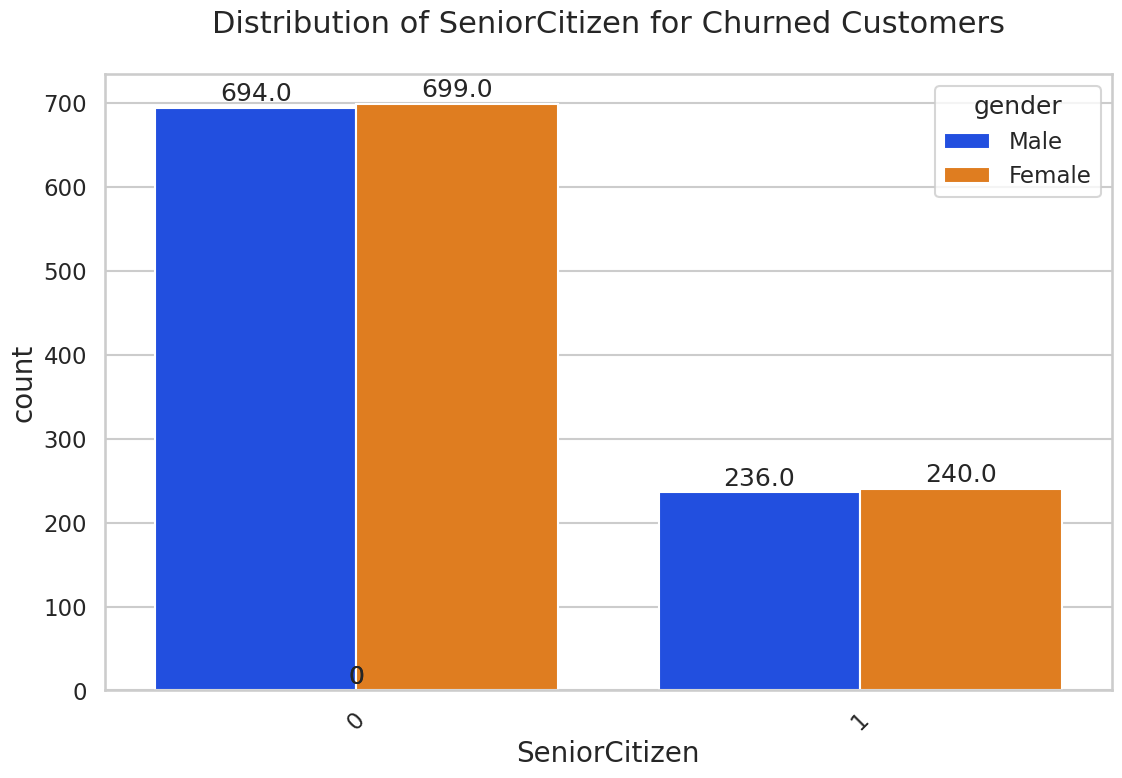

In [90]:
uniplot(df_churn,col='SeniorCitizen',title='Distribution of SeniorCitizen for Churned Customers',hue='gender')

In [91]:
df_dummies.to_csv('Customer_churn_dummies.csv', index=False)

#Model Building

In [217]:
import pandas as pd
from sklearn import metrics
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.combine import SMOTEENN

In [251]:
df = pd.read_csv('Customer_churn_dummies.csv')
df.head(5)

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,True,False,False,True,True,False,...,False,False,True,False,True,False,False,False,False,False
1,0,56.95,1889.50,0,False,True,True,False,True,False,...,False,False,False,True,False,False,True,False,False,False
2,0,53.85,108.15,1,False,True,True,False,True,False,...,False,False,False,True,True,False,False,False,False,False
3,0,42.30,1840.75,0,False,True,True,False,True,False,...,True,False,False,False,False,False,False,True,False,False
4,0,70.70,151.65,1,True,False,True,False,True,False,...,False,False,True,False,True,False,False,False,False,False


In [252]:
X = df.drop('Churn', axis=1)
y = df['Churn']

In [220]:
print(X.columns)

Index(['SeniorCitizen', 'MonthlyCharges', 'TotalCharges', 'gender_Female',
       'gender_Male', 'Partner_No', 'Partner_Yes', 'Dependents_No',
       'Dependents_Yes', 'PhoneService_No', 'PhoneService_Yes',
       'MultipleLines_No', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaperlessB

In [221]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

##Decision Tree Classifier

In [222]:
model_dt = DecisionTreeClassifier(criterion='entropy', random_state=100, max_depth=6, min_samples_leaf=8)

In [223]:
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=8,
                       random_state=100)

In [224]:
y_pred = model_dt.predict(X_test)
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [225]:
model_dt.score(X_test, y_test)

0.7882018479033405

In [226]:
print(classification_report(y_test, y_pred, labels=[0, 1]))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1038
           1       0.62      0.51      0.56       369

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



In [227]:
print(confusion_matrix(y_test, y_pred))

[[922 116]
 [182 187]]


In [228]:
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTEENN or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.valida

In [229]:
xr_train, xr_test, yr_train, yr_test = train_test_split(X_resampled, y_resampled, test_size=0.2)

In [230]:
model_dt_smote = DecisionTreeClassifier(criterion='entropy', random_state=100, max_depth=6, min_samples_leaf=8)

In [231]:
model_dt_smote.fit(xr_train, yr_train)
yr_predict = model_dt_smote.predict(xr_test)
model_score_r = model_dt_smote.score(xr_test, yr_test)

In [232]:
print(confusion_matrix(yr_test, yr_predict))
print(model_score_r)

[[500  36]
 [ 25 607]]
0.9477739726027398


In [233]:
print(metrics.classification_report(yr_test, yr_predict))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       536
           1       0.94      0.96      0.95       632

    accuracy                           0.95      1168
   macro avg       0.95      0.95      0.95      1168
weighted avg       0.95      0.95      0.95      1168



##Random Forest Classifier

In [234]:
model_dt = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=100, max_depth=6, min_samples_leaf=8)
model_dt.fit(X_train, y_train)
y_pred = model_dt.predict(X_test)

In [235]:
print(confusion_matrix(y_test, y_pred))
model_dt.score(X_test, y_test)

[[957  81]
 [207 162]]


0.7953091684434968

In [236]:
print(classification_report(y_test, y_pred, labels=[0, 1]))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1038
           1       0.67      0.44      0.53       369

    accuracy                           0.80      1407
   macro avg       0.74      0.68      0.70      1407
weighted avg       0.78      0.80      0.78      1407



In [237]:
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTEENN or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.valida

In [238]:
xr_train, xr_test, yr_train, yr_test = train_test_split(X_resampled, y_resampled, test_size=0.2)

In [239]:
model_dt_smote = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=100, max_depth=6, min_samples_leaf=8)
model_dt_smote.fit(xr_train, yr_train)

RandomForestClassifier(criterion='entropy', max_depth=6, min_samples_leaf=8,
                       random_state=100)

In [240]:
y_pred_smote = model_dt_smote.predict(xr_test)

In [241]:
print(confusion_matrix(yr_test, y_pred_smote))
print(model_dt_smote.score(xr_test, yr_test))

[[514  49]
 [ 22 600]]
0.940084388185654


In [242]:
print(classification_report(yr_test, y_pred_smote, labels=[0, 1]))

              precision    recall  f1-score   support

           0       0.96      0.91      0.94       563
           1       0.92      0.96      0.94       622

    accuracy                           0.94      1185
   macro avg       0.94      0.94      0.94      1185
weighted avg       0.94      0.94      0.94      1185



In [243]:
filename = 'model.sav'

In [244]:
pickle.dump(model_dt_smote, open(filename, 'wb'))

#Reduction Dimensionality

In [275]:
from sklearn.decomposition import PCA
pca = PCA(0.9)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

xr_train_1 = pca.fit_transform(X_train, y_train)
xr_test_1 = pca.transform(X_test)

In [276]:
model_pca = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=100, max_depth=6, min_samples_leaf=8)
model_pca.fit(xr_train_1, y_train)

RandomForestClassifier(criterion='entropy', max_depth=6, min_samples_leaf=8,
                       random_state=100)

In [277]:
y_pred_pca = model_pca.predict(xr_test_1)

In [282]:
print(confusion_matrix(y_test, y_pred_pca))
print(model_pca.score(xr_test_1, y_test))

[[1008   30]
 [ 317   52]]
0.7533759772565742


In [284]:
print(classification_report(y_test, y_pred_pca, labels=[0, 1]))

              precision    recall  f1-score   support

           0       0.76      0.97      0.85      1038
           1       0.63      0.14      0.23       369

    accuracy                           0.75      1407
   macro avg       0.70      0.56      0.54      1407
weighted avg       0.73      0.75      0.69      1407



#Testing New Data

In [249]:
dt_t = pd.read_csv("first_telc.csv")
dt_t.drop(columns = ['Unnamed: 0'], inplace = True)
dt_t

labels = ["{0} - {1}".format(i, i + 11) for i in range(1, max_tenure_value, 12)]
dt_t['tenure_group'] = pd.cut(dt_t.tenure, range(1, max_tenure_value + 10, 12), right=False, labels=labels)
dt_t.drop(columns = ['tenure'], inplace = True)

categorical_columns = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
    'MultipleLines', 'InternetService', 'OnlineSecurity',
    'OnlineBackup', 'DeviceProtection', 'TechSupport',
    'StreamingTV', 'StreamingMovies', 'Contract',
    'PaperlessBilling', 'PaymentMethod', 'tenure_group'
]

# Crear columnas dummies para las variables categóricas
dt_dummies = pd.get_dummies(dt_t[categorical_columns])

# Separar las columnas no categóricas
dt_non_categorical = dt_t.drop(columns=categorical_columns)

# Concatenar las columnas dummies con las no categóricas
final_data = pd.concat([dt_dummies, dt_non_categorical], axis=1)

# Cambiar el orden de las columnas
final_data = final_data[[
    'SeniorCitizen', 'MonthlyCharges', 'TotalCharges', 'gender_Female',
    'gender_Male', 'Partner_No', 'Partner_Yes', 'Dependents_No',
    'Dependents_Yes', 'PhoneService_No', 'PhoneService_Yes',
    'MultipleLines_No', 'MultipleLines_No phone service',
    'MultipleLines_Yes', 'InternetService_DSL',
    'InternetService_Fiber optic', 'InternetService_No',
    'OnlineSecurity_No', 'OnlineSecurity_No internet service',
    'OnlineSecurity_Yes', 'OnlineBackup_No',
    'OnlineBackup_No internet service', 'OnlineBackup_Yes',
    'DeviceProtection_No', 'DeviceProtection_No internet service',
    'DeviceProtection_Yes', 'TechSupport_No',
    'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No',
    'StreamingTV_No internet service', 'StreamingTV_Yes',
    'StreamingMovies_No', 'StreamingMovies_No internet service',
    'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
    'Contract_Two year', 'PaperlessBilling_No', 'PaperlessBilling_Yes',
    'PaymentMethod_Bank transfer (automatic)',
    'PaymentMethod_Credit card (automatic)',
    'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
    'tenure_group_1 - 12', 'tenure_group_13 - 24', 'tenure_group_25 - 36',
    'tenure_group_37 - 48', 'tenure_group_49 - 60', 'tenure_group_61 - 72'
]]

# Asegúrate de que final_data sea un DataFrame con las columnas correctas
y_pred_smote = model_dt_smote.predict(final_data.iloc[0:final_data.shape[1]])  # Selecciona la primera fila
print(y_pred_smote)

[1 0 0 1 0 1 1 1 1 1 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 1 1 0 0 1 1 0 1 0 1 1
 0 0 0 0 1 1 0 0 0 0 0 0 0]
